# k-Means Clustering Pokemon Weinbender

### Alec Weinbender

In [45]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import itertools
from sklearn.metrics import silhouette_score, silhouette_samples, davies_bouldin_score
from sklearn import preprocessing
from sklearn.decomposition import PCA
import os
from PIL import Image
import numpy as np
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
from collections import Counter

## Excercise 1: 
Import the Candy data and show the first 10 rows.  Write a dataset description based on the information provided.  

In [81]:
import os
from PIL import Image
import numpy as np

def load_images_from_folder(folder, target_size=(224, 224)):
    images = []
    labels = []
    valid_extensions = {".jpg", ".jpeg", ".png", ".bmp", ".gif", ".tiff"}
    for label, subdir in enumerate(sorted(os.listdir(folder))):
        subdir_path = os.path.join(folder, subdir)
        if os.path.isdir(subdir_path):
            for filename in os.listdir(subdir_path):
                file_path = os.path.join(subdir_path, filename)
                ext = os.path.splitext(filename)[1].lower()
                if ext in valid_extensions:
#                     print(f"Processing image: {file_path}")
                    try:
                        img = Image.open(file_path).convert('RGB')
                        img = img.resize(target_size)
                        images.append(np.array(img))
                        labels.append(label)
                    except Exception as e:
                        print(f"Error loading {file_path}: {e}")
                else:
                    print(f"Skipping non-image file: {file_path}")
    return np.array(images, dtype=np.uint8), np.array(labels, dtype=np.int32)

In [82]:
# Load training and testing data
train_images, train_labels = load_images_from_folder("../../stratified-data/train")
test_images, test_labels = load_images_from_folder("../../stratified-data/test")

Skipping non-image file: ../../stratified-data/train/Abra/desktop.ini


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Skipping non-image file: ../../stratified-data/train/Muk/d4ddd14c1d4340a680018d0b805bd1b2.asp
Skipping non-image file: ../../stratified-data/train/Tentacruel/d6fb0a3046364ea2b49525c6f6b966e5.svg
Skipping non-image file: ../../stratified-data/train/Wigglytuff/4f3c72df431a49d4b3fbc84c94f2261e.jpg~c200
Skipping non-image file: ../../stratified-data/train/Zapdos/c99b2d19544c4cbbacd7711ade660279.svg
Skipping non-image file: ../../stratified-data/test/Mewtwo/00000008.png.sb-334870d9-FK2TVI


Each image becomes a single row in a 2D array where:
Number of rows = Number of images.
Number of columns = Total number of pixels per image (e.g., 
224x224x3 = 150,528

In [85]:
# Flatten images
train_images_flat = train_images.reshape(len(train_images), -1)
test_images_flat = test_images.reshape(len(test_images), -1)

Scales pixel values from their original range ([0, 255] for 8-bit images) to a normalized range of [0, 1].
Normalization helps improve the performance of many machine learning algorithms by standardizing the input data.

In [86]:
# Normalize pixel values
train_images_flat = train_images_flat / 255.0
test_images_flat = test_images_flat / 255.0

Reduces shapes of images from 150,528 to 2

In [87]:
pca = PCA(n_components=2)
train_images_pca = pca.fit_transform(train_images_flat)
test_images_pca = pca.transform(test_images_flat)

Training the KMeans model

In [88]:
kmeans = KMeans(n_clusters=148)
kmeans.fit(train_images_pca)
train_cluster_labels = kmeans.labels_

In [89]:
test_cluster_labels = kmeans.predict(test_images_pca)

View various accuracy scores

In [90]:
ari_score = adjusted_rand_score(test_labels, test_cluster_labels)
nmi_score = normalized_mutual_info_score(test_labels, test_cluster_labels)
silhouette = silhouette_score(test_images_pca, test_cluster_labels)

print(f"ARI Score: {ari_score}")
print(f"NMI Score: {nmi_score}")
print(f"Silhouette Score: {silhouette:.2f}")

ARI Score: 0.008039232624108807
NMI Score: 0.24853728183271484
Silhouette Score: 0.31


Assigning Ground Truth Lables (Actual labels)

In [91]:
def map_clusters_to_folder_names(kmeans_labels, true_labels):
    cluster_to_folder = {}
    for cluster in np.unique(kmeans_labels):
        indices = np.where(kmeans_labels == cluster)[0]
        cluster_true_labels = true_labels[indices]
        most_common_label = Counter(cluster_true_labels).most_common(1)[0][0]
        cluster_to_folder[cluster] = most_common_label
    return cluster_to_folder

In [92]:
cluster_to_folder_mapping = map_clusters_to_folder_names(kmeans.labels_, train_labels)
print(cluster_to_folder_mapping)
predicted_labels = [cluster_to_folder_mapping[cluster] for cluster in test_cluster_labels]

{0: 35, 1: 86, 2: 99, 3: 82, 4: 109, 5: 11, 6: 13, 7: 3, 8: 45, 9: 57, 10: 49, 11: 115, 12: 101, 13: 54, 14: 146, 15: 39, 16: 117, 17: 131, 18: 54, 19: 20, 20: 17, 21: 147, 22: 134, 23: 34, 24: 60, 25: 105, 26: 101, 27: 9, 28: 14, 29: 20, 30: 40, 31: 146, 32: 131, 33: 1, 34: 58, 35: 82, 36: 56, 37: 118, 38: 43, 39: 122, 40: 119, 41: 91, 42: 68, 43: 73, 44: 73, 45: 105, 46: 9, 47: 82, 48: 130, 49: 26, 50: 9, 51: 28, 52: 27, 53: 82, 54: 127, 55: 61, 56: 128, 57: 16, 58: 118, 59: 101, 60: 29, 61: 99, 62: 91, 63: 14, 64: 20, 65: 61, 66: 109, 67: 43, 68: 56, 69: 40, 70: 9, 71: 110, 72: 124, 73: 7, 74: 9, 75: 40, 76: 17, 77: 29, 78: 34, 79: 16, 80: 135, 81: 82, 82: 84, 83: 12, 84: 101, 85: 121, 86: 108, 87: 15, 88: 109, 89: 54, 90: 21, 91: 88, 92: 9, 93: 146, 94: 5, 95: 146, 96: 44, 97: 29, 98: 39, 99: 57, 100: 57, 101: 127, 102: 38, 103: 101, 104: 30, 105: 109, 106: 100, 107: 65, 108: 65, 109: 73, 110: 14, 111: 125, 112: 142, 113: 1, 114: 123, 115: 10, 116: 127, 117: 83, 118: 74, 119: 6, 12

In [93]:
num_images = 0
correct_images = 0

for i, (true_label, predicted_label) in enumerate(zip(test_labels, predicted_labels)):
    num_images = i
    if true_label == predicted_label:  
#         print(f"Test Image {i}: True Label = {true_label}, Predicted Label = {predicted_label}")
        correct_images = correct_images + 1
        
print(correct_images/num_images)

0.03936931708260785


Accuracy of model = 3.9%

View of clusters in 2D. This is possible because the PCA is 2 dimensions

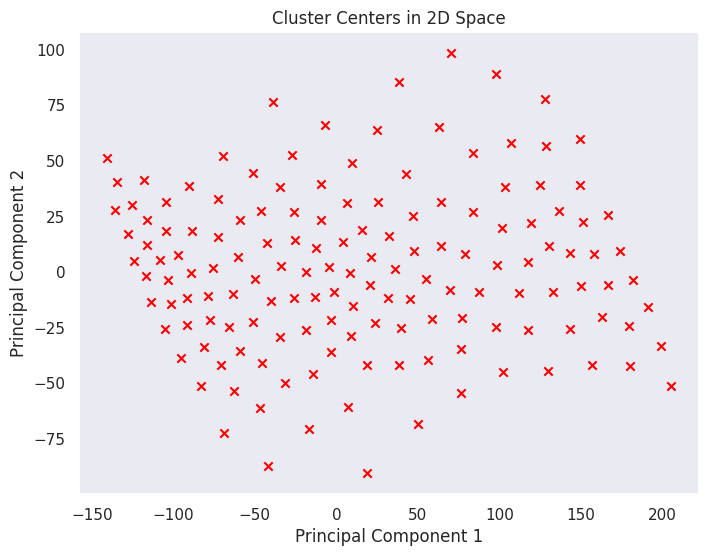

In [94]:
import matplotlib.pyplot as plt

# Scatter plot of cluster centers in 2D
plt.figure(figsize=(8, 6))
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x')
plt.title("Cluster Centers in 2D Space")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid()
plt.show()

In [95]:
def preprocess_image(image_path, pca, image_size=(224, 224)):
    """
    Preprocess a single image for K-Means prediction.
    Args:
        image_path (str): Path to the image file.
        pca (PCA): Trained PCA model.
        image_size (tuple): Target size for the image (width, height).

    Returns:
        np.array: PCA-transformed image data.
    """
    # Load the image
    img = Image.open(image_path).convert('RGB')
    
    # Resize to the expected size
    img = img.resize(image_size)
    
    # Flatten and normalize the image
    img_flat = np.array(img).reshape(-1) / 255.0  # Flatten and normalize to [0, 1]
    
    # Apply PCA transformation
    img_pca = pca.transform([img_flat])  # Transform as a single sample
    
    return img_pca

def predict_image(image_path, pca, kmeans):
    """
    Predict the cluster for a single image.
    Args:
        image_path (str): Path to the image file.
        pca (PCA): Trained PCA model.
        kmeans (KMeans): Trained KMeans model.

    Returns:
        int: Predicted cluster label.
    """
    # Preprocess the image
    img_pca = preprocess_image(image_path, pca)
    
    # Predict the cluster
    cluster_label = kmeans.predict(img_pca)
    
    return cluster_label[0]  # Return the cluster label


Testing for images of Abra. Model says Abra is cluster 101

In [96]:
image_path = "../../stratified-data/test/Abra/00000000.png"
predicted_cluster = predict_image(image_path, pca, kmeans)
print(f"The image belongs to cluster {predicted_cluster}")

The image belongs to cluster 24


In [97]:
image_path = "../../stratified-data/test/Abra/00000052.png"
predicted_cluster = predict_image(image_path, pca, kmeans)
print(f"The image belongs to cluster {predicted_cluster}")

The image belongs to cluster 67
